# 1. NSL with CNN

In [1]:
import numpy as np
np.random.seed(5) 
import tensorflow as tf
tf.random.set_seed(2)
import matplotlib.pyplot as plt
%matplotlib inline
import os
import cv2
import keras

In [2]:
train_dir = "C:/Users/dell/Desktop/finedataset"
eval_dir = "D:/finalproject/test/collectedimages"

In [3]:
tf.__version__

'2.9.1'

# Loading the data


In [4]:
def load_images(directory):
    images = []
    labels = []
    for idx, label in enumerate(uniq_labels):
        for file in os.listdir(directory + "/" + label):
            filepath = directory + "/" + label + "/" + file
            image = cv2.resize(cv2.imread(filepath),(64,64))
            images.append(image)
            labels.append(idx)
    images = np.array(images)
    labels = np.array(labels)
    return(images, labels)


In [5]:
uniq_labels = sorted(os.listdir(train_dir))
images, labels = load_images(directory = train_dir)
uniq_labels == sorted(os.listdir(eval_dir))
X_eval, y_eval = load_images(directory = eval_dir)


In [6]:
len(labels)

77720

## 2.1 Train-Test Split

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size = 0.3, stratify = labels, random_state=10)

n = len(uniq_labels)
train_n = len(X_train)
test_n = len(X_test)

print("Total number of symbols: ", n)
print("Number of training images: " , train_n)
print("Number of testing images: ", test_n)

eval_n = len(X_eval)
print("Number of evaluation images: ", eval_n)

Total number of symbols:  37
Number of training images:  54404
Number of testing images:  23316
Number of evaluation images:  744




# 3. Printing images


In [8]:
#Helper function to print images
def print_images(image_list):
    n = int(len(image_list) / len(uniq_labels))
    cols = 8
    rows = 5
    fig = plt.figure(figsize = (24, 12))

    for i in range(len(uniq_labels)):
        ax = plt.subplot(rows, cols, i + 1)
        plt.imshow(image_list[int(n*i)])
        plt.title(uniq_labels[i])
        ax.title.set_fontsize(20)
        ax.axis('on')
    plt.show()

Training Images: 


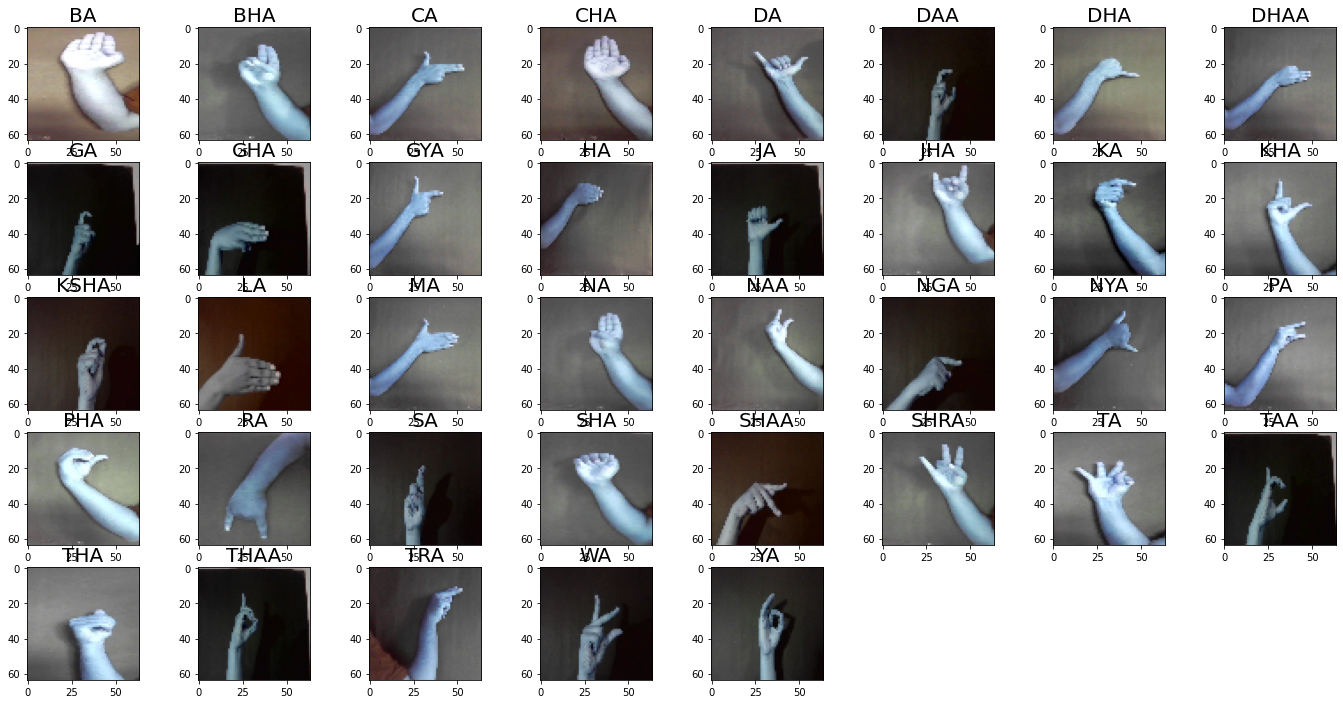

In [9]:
y_train_in = y_train.argsort()
y_train = y_train[y_train_in]
X_train = X_train[y_train_in]

print("Training Images: ")
print_images(image_list = X_train)

Testing images: 


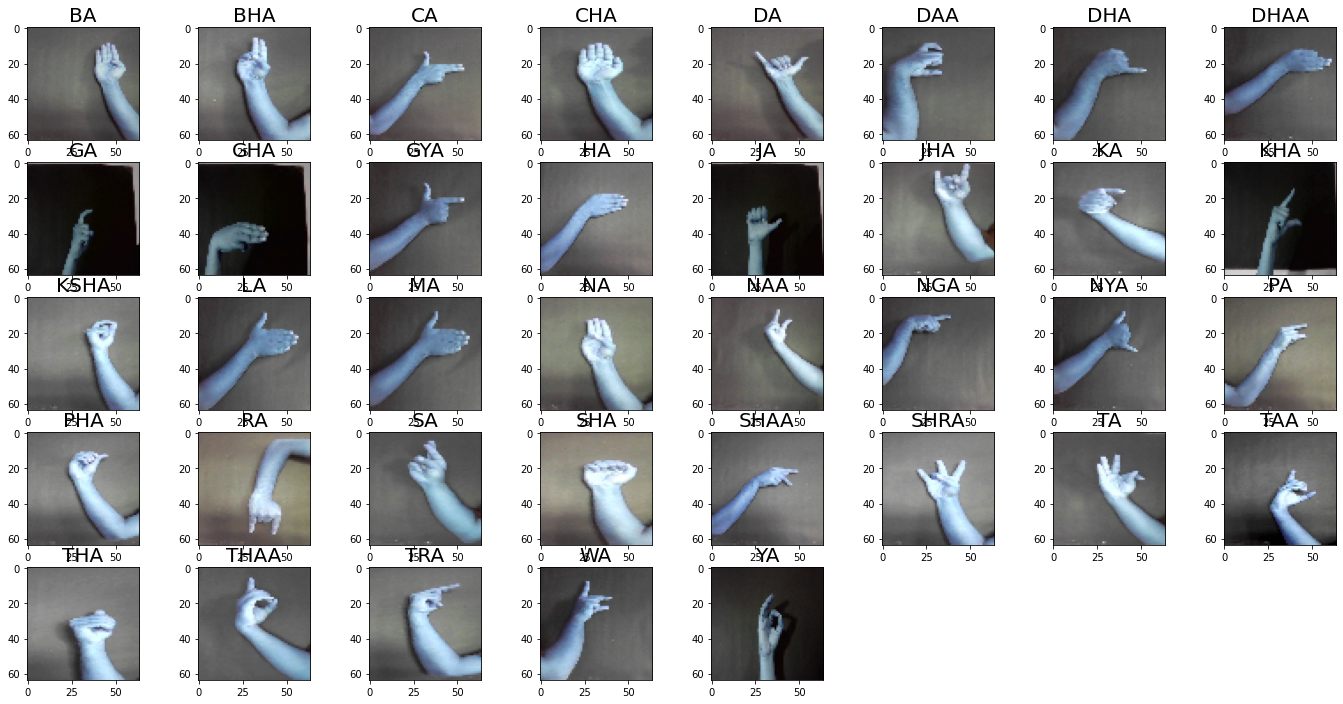

In [10]:
y_test_in = y_test.argsort()
y_test = y_test[y_test_in]
X_test = X_test[y_test_in]

print("Testing images: ")
print_images(image_list = X_test)

Evaluation images: 


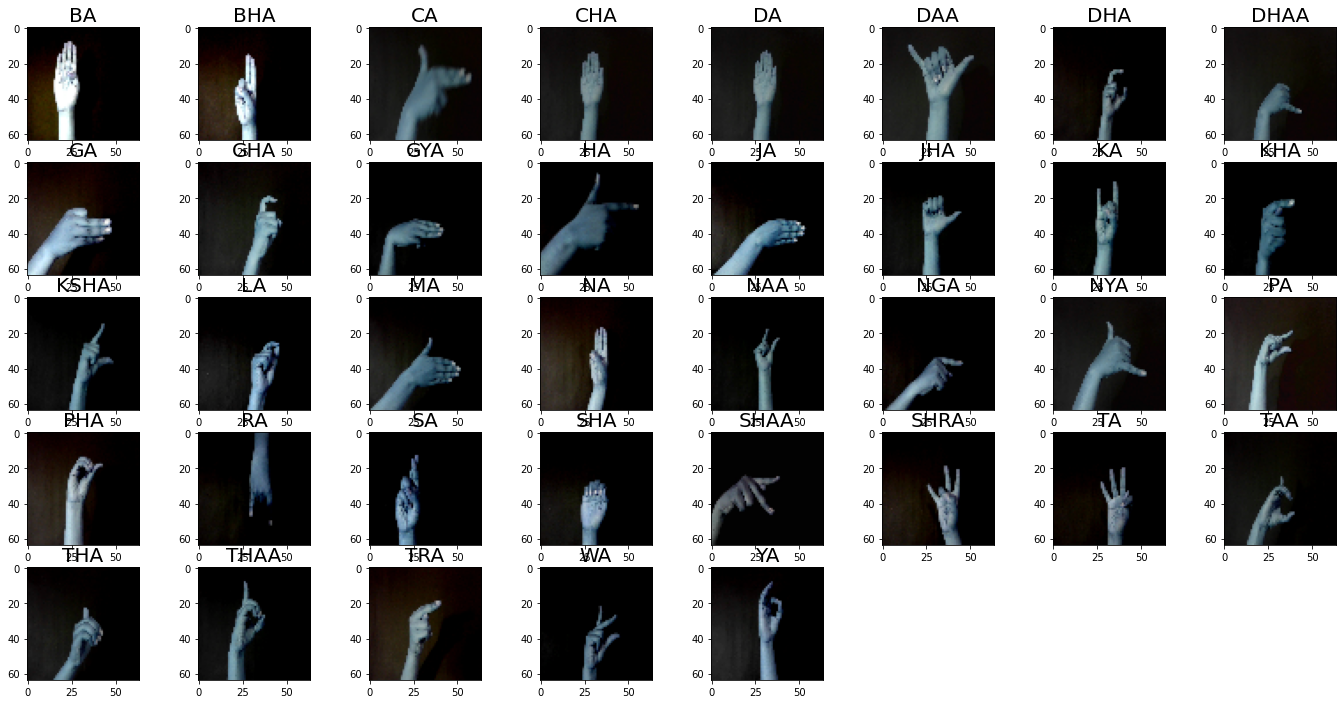

In [11]:
print("Evaluation images: ")
print_images(image_list = X_eval)




# 4. Preprocessing: One-hot enconding the data


In [12]:
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)
y_eval = keras.utils.to_categorical(y_eval)

In [13]:
print(y_train[0])
print(len(y_train[0]))

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
37



# 5. Preprocessing - Normalize RGB values

In [14]:
X_train = X_train.astype('float32')/255.0
X_test = X_test.astype('float32')/255.0
X_eval = X_eval.astype('float32')/255.0

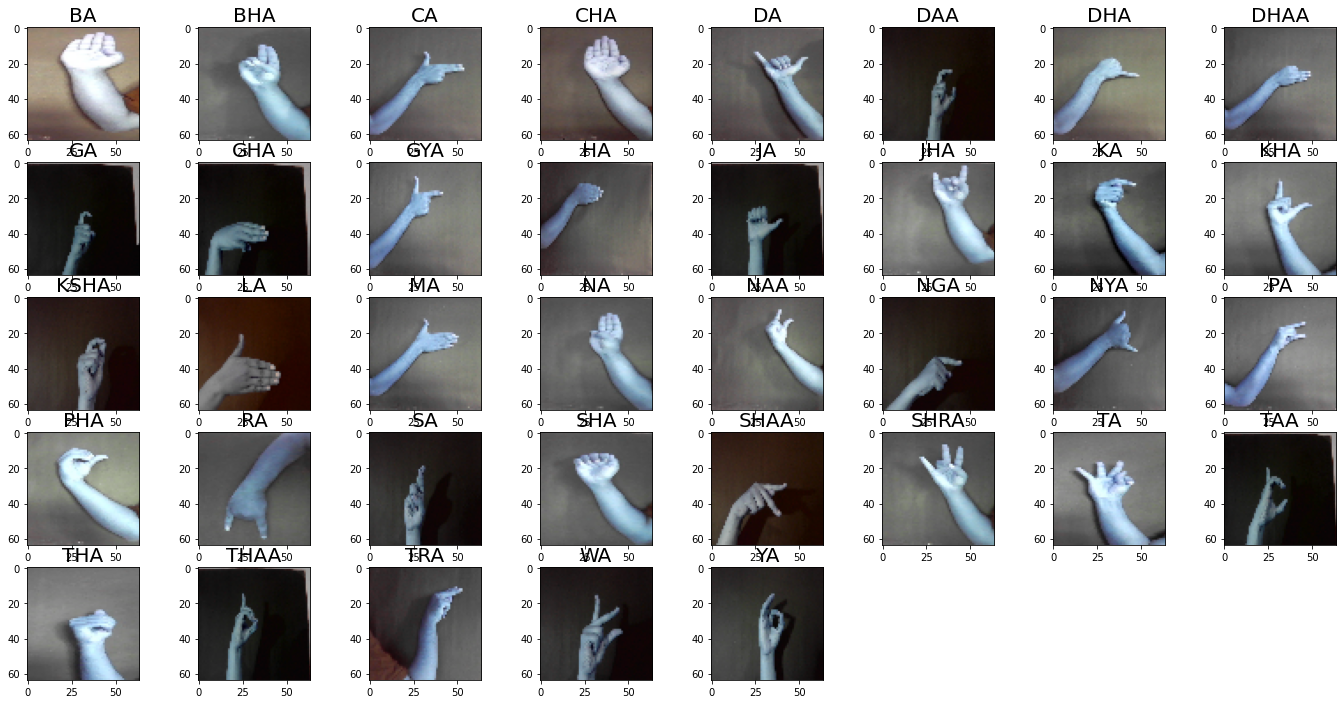

In [15]:
print_images(image_list=X_train)


# 6. Define and run the model


In [16]:
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Conv2D, Dense, Dropout, Flatten,Activation
from keras.layers import Flatten, Dense
from keras.models import Sequential


model = Sequential()
model.add(Conv2D(filters = 64, kernel_size = 5, padding = 'same', activation = 'ReLU', 
                 input_shape = (64,64,3)))
model.add(Conv2D(filters = 64, kernel_size = 5, padding = 'same', activation = 'ReLU'))
model.add(MaxPooling2D(pool_size = (4,4)))
model.add(Dropout(0.5))
# model.add(Conv2D(filters = 64, kernel_size = 5, padding = 'same', activation = 'ReLU'))
# model.add(MaxPooling2D(pool_size = (4, 4)))
# model.add(Dropout(0.5))

model.add(Conv2D(filters = 128 , kernel_size = 5, padding = 'same', activation = 'ReLU'))
model.add(Conv2D(filters = 128 , kernel_size = 5, padding = 'same', activation = 'ReLU'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(filters = 256 , kernel_size = 5, padding = 'same', activation = 'ReLU'))
model.add(Dropout(0.5))
model.add(Conv2D(filters = 256 , kernel_size = 5, padding = 'same', activation = 'ReLU'))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(37, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 64)        4864      
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 64)        102464    
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 128)       204928    
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 128)       409728    
                                                        

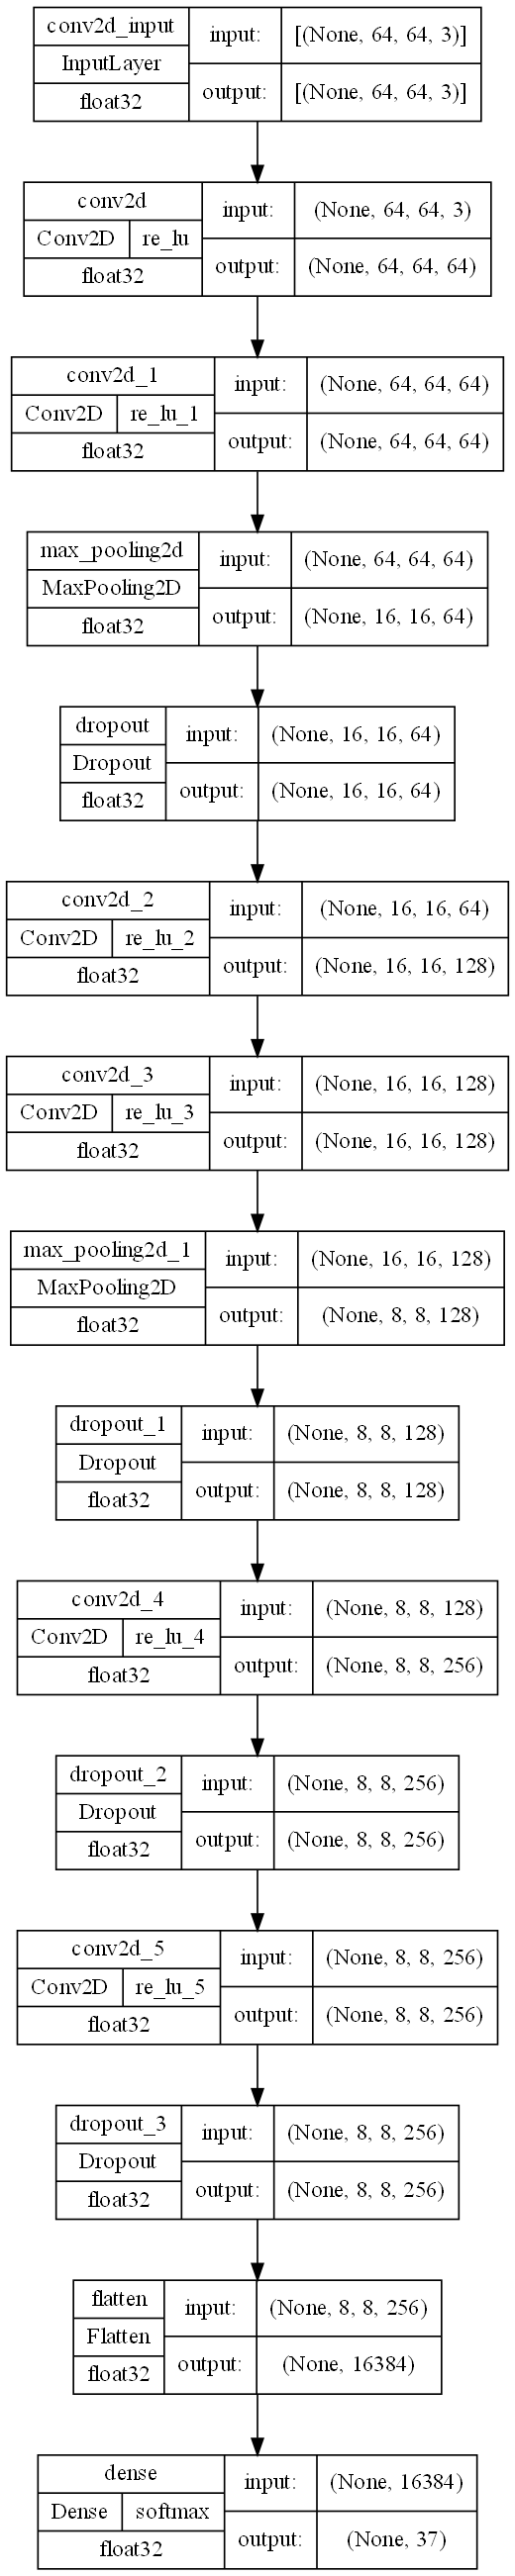

In [17]:
tf.keras.utils.plot_model(
    model,
    to_file='model.png',
    show_shapes=True,
    show_dtype=True,
    show_layer_names=True,
    rankdir='TB',
    expand_nested=True,
    dpi=120,
    layer_range=None,
    show_layer_activations=True
)

In [18]:
model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [19]:
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
callbacks = [ ReduceLROnPlateau(monitor='loss', patience=2, cooldown=1),
              EarlyStopping(monitor='accuracy', min_delta=1e-6, patience=2)]

In [20]:
hist = model.fit(X_train, y_train, epochs =10,batch_size =5,callbacks=callbacks)


Epoch 1/10
10881/10881 [==============================] - 175s 16ms/step - loss: 0.6468 - accuracy: 0.8456
Epoch 2/10
10881/10881 [==============================] - 168s 15ms/step - loss: 0.2489 - accuracy: 0.9834
Epoch 3/10
10881/10881 [==============================] - 168s 15ms/step - loss: 0.2276 - accuracy: 0.9904
Epoch 4/10
10881/10881 [==============================] - 169s 16ms/step - loss: 0.2277 - accuracy: 0.9922
Epoch 5/10
10881/10881 [==============================] - 168s 15ms/step - loss: 0.2553 - accuracy: 0.9943
Epoch 6/10
10881/10881 [==============================] - 168s 15ms/step - loss: 0.2000 - accuracy: 0.9962
Epoch 7/10
10881/10881 [==============================] - 168s 15ms/step - loss: 0.2763 - accuracy: 0.9966
Epoch 8/10
10881/10881 [==============================] - 168s 15ms/step - loss: 0.3289 - accuracy: 0.9957
Epoch 9/10
10881/10881 [==============================] - 168s 15ms/step - loss: 0.1876 - accuracy: 0.9972
Epoch 10/10
10881/10881 [============

# 7. Test the model


In [21]:
score = model.evaluate(x = X_test, y = y_test, verbose = 0)
print('Accuracy for test images:', round(score[1]*100, 3), '%')
score = model.evaluate(x = X_eval, y = y_eval, verbose = 0)
print('Accuracy for evaluation images:', round(score[1]*100,3), '%')

Accuracy for test images: 100.0 %
Accuracy for evaluation images: 75.806 %


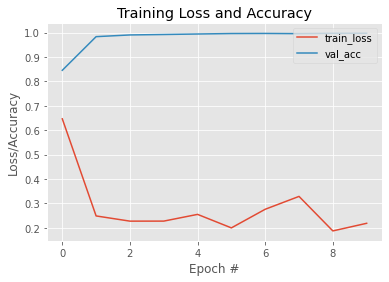

In [22]:
# plot training/validation loss/accuracy
plt.style.use("ggplot")
plt.figure()
N = 10
plt.plot(np.arange(0,N), hist.history["loss"], label="train_loss")
plt.plot(np.arange(0,N), hist.history["accuracy"], label="val_acc")

plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="upper right")

In [23]:
model.save('20.h5') 


# 8. Confusion Matrices

In [24]:
#Helper function to plot confusion matrix
def plot_confusion_matrix(y, y_pred):
    y = np.argmax(y, axis = 1)
    y_pred = np.argmax(y_pred, axis = 1)
    cm = confusion_matrix(y, y_pred)
    plt.figure(figsize = (24, 20))
    ax = plt.subplot()
    plt.imshow(cm, interpolation = 'nearest', cmap = plt.cm.Purples)
    plt.colorbar()
    plt.title("Confusion Matrix")
    tick_marks = np.arange(len(uniq_labels))
    plt.xticks(tick_marks, uniq_labels, rotation=45)
    plt.yticks(tick_marks, uniq_labels)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    ax.title.set_fontsize(20)
    ax.xaxis.label.set_fontsize(16)
    ax.yaxis.label.set_fontsize(16)
    limit = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment = "center",color = "white" if cm[i, j] > limit else "black")
    plt.show()

## 8.1 Confusion Matrix for Test Set

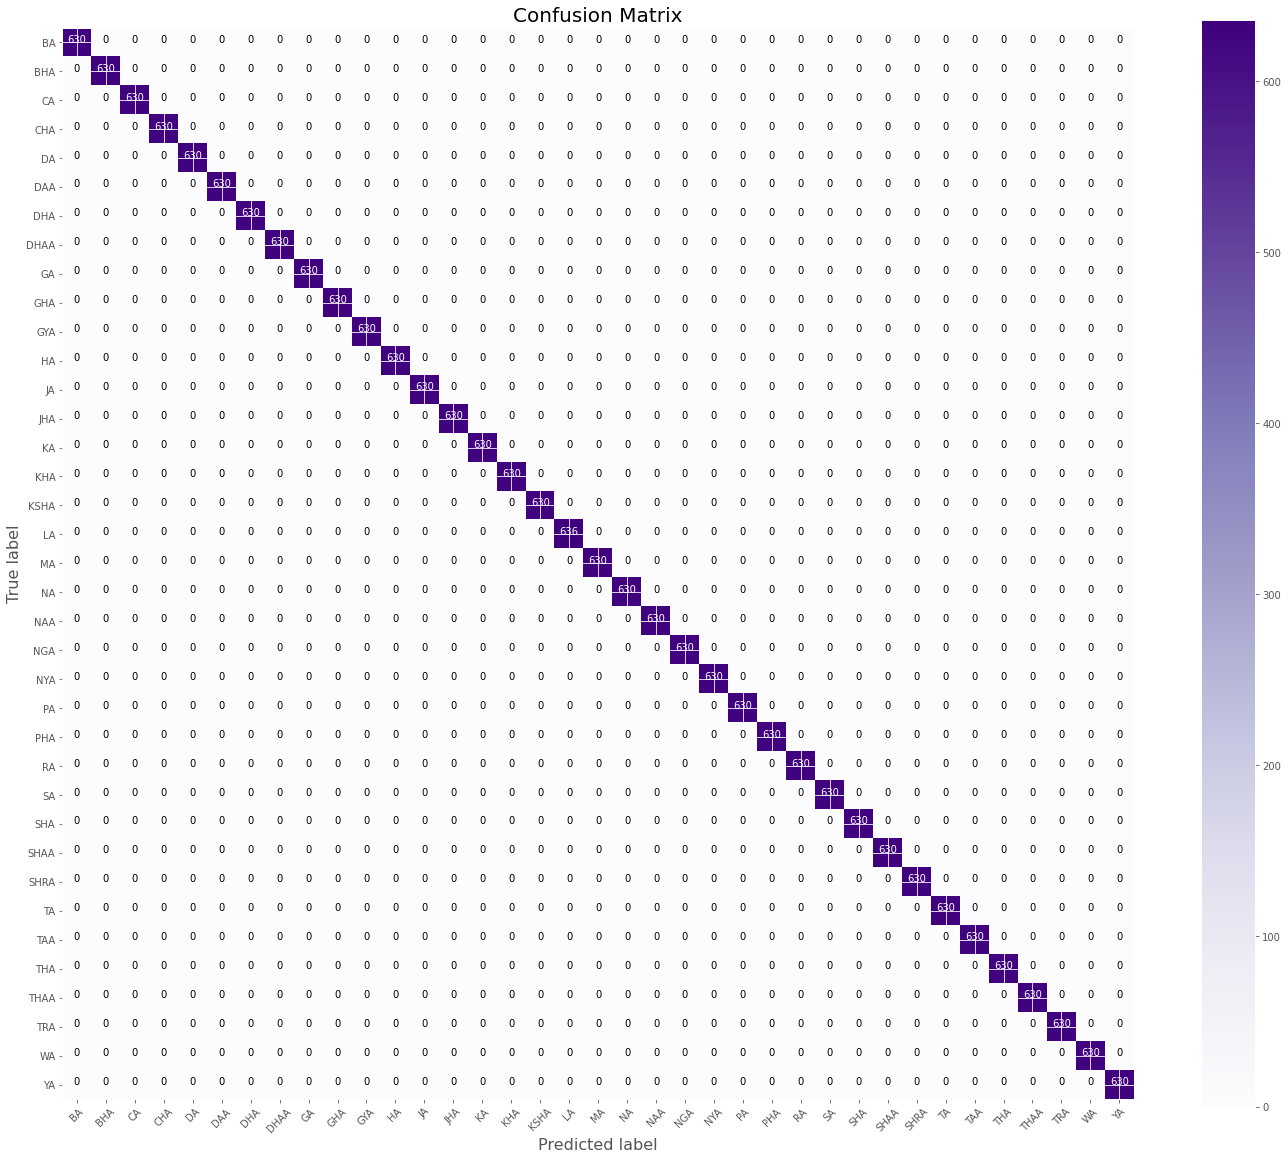

In [26]:
from sklearn.metrics import confusion_matrix
import itertools

y_test_pred = model.predict(X_test, batch_size = 5, verbose = 0)
plot_confusion_matrix(y_test, y_test_pred)

## 8.2 Confusion Matrix for Evaluation Set

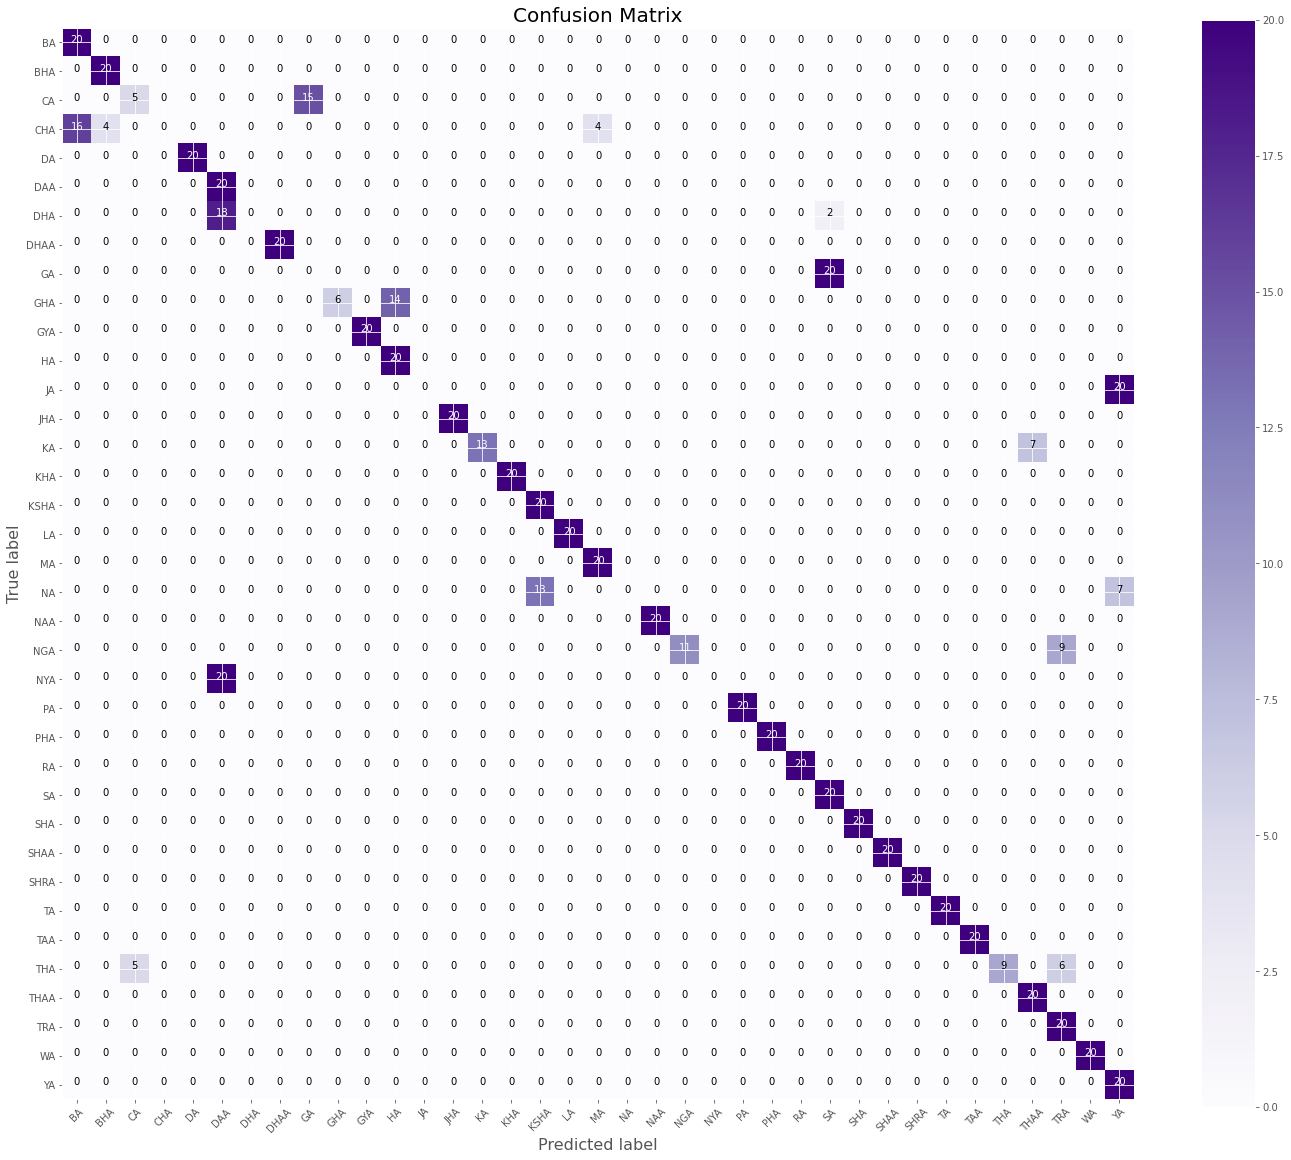

In [27]:
y_eval_pred = model.predict(X_eval, batch_size = 5, verbose = 0)
plot_confusion_matrix(y_eval, y_eval_pred)

# 9. Prediction

In [32]:
# class_names=['KA','KHA','GA','GHA','NGA','CA','CHA','JA','JHA','NYA','TA','THA','DA','DHA','NA','TAA','THAA','DAA','DHAA','NAA','PA','PHA','BA','BHA','MA','YA','RA','LA','WA','SHAA','SHA','SA','HA','KSHA','TRA','GYA','SHRA']
class_names=['BA','BHA','CA','CHA','DA','DAA','DHA','DHAA','GA','GHA','GYA','HA','JA','JHA','KA','KHA','KSHA','LA','MA','NA','NAA','NGA','NYA','PA','PHA','RA','SA','SHA','SHAA','SHRA','TA','TAA','THA','THAA','TRA','WA','YA']
from keras.preprocessing import image
# predicting images
img = keras.utils.load_img('D:/finalproject/test/collectedimages/YA/YA.5a2e832e-ff9d-11ec-a68d-d0e9e6422b2b.jpg', target_size=(64,64))
x = keras.utils.img_to_array(img)
x=x.astype('float32')/255.0
x = np.expand_dims(img, axis=0)


In [33]:
x.shape

(1, 64, 64, 3)

In [34]:
classes = model.predict(x, batch_size=5)
print(classes)
class_names[np.argmax(classes)]

1/1 [==============================] - 0s 81ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


'YA'

In [ ]:
if(class_names[np.argmax(classes)]=="KA"):
  print("क")
elif(class_names[np.argmax(classes)]=="KHA"):
  print("ख")
elif(class_names[np.argmax(classes)]=="GA"):
  print("ग")
elif(class_names[np.argmax(classes)]=="GHA"):
  print("घ")
elif(class_names[np.argmax(classes)]=="NGA"):
  print("ङ")
elif(class_names[np.argmax(classes)]=="CA"):
  print("च")
elif(class_names[np.argmax(classes)]=="CHA"):
  print("छ")
elif(class_names[np.argmax(classes)]=="JA"):
  print("ज")
elif(class_names[np.argmax(classes)]=="JHA"):
  print("झ")
elif(class_names[np.argmax(classes)]=="NYA"):
  print("ञ")
elif(class_names[np.argmax(classes)]=="TA"):
  print("ट")
elif(class_names[np.argmax(classes)]=="THA"):
  print("ठ")
elif(class_names[np.argmax(classes)]=="DA"):
  print("ड")
elif(class_names[np.argmax(classes)]=="DHA"):
  print("ढ")
elif(class_names[np.argmax(classes)]=="NA"):
  print("ण")
elif(class_names[np.argmax(classes)]=="TAA"):
  print("त")
elif(class_names[np.argmax(classes)]=="THAA"):
  print("थ")
elif(class_names[np.argmax(classes)]=="DAA"):
  print("द")
elif(class_names[np.argmax(classes)]=="DHAA"):
  print("ध")
elif(class_names[np.argmax(classes)]=="NAA"):
  print("न")
elif(class_names[np.argmax(classes)]=="PA"):
  print("प")
elif(class_names[np.argmax(classes)]=="PHA"):
  print("फ")
elif(class_names[np.argmax(classes)]=="BA"):
  print("ब")
elif(class_names[np.argmax(classes)]=="BHA"):
  print("भ")
elif(class_names[np.argmax(classes)]=="MA"):
  print("म")
elif(class_names[np.argmax(classes)]=="YA"):
  print("य")
elif(class_names[np.argmax(classes)]=="RA"):
  print("र")
elif(class_names[np.argmax(classes)]=="LA"):
  print("ल")
elif(class_names[np.argmax(classes)]=="WA"):
  print("व")
elif(class_names[np.argmax(classes)]=="SHAA"):
  print("श")
elif(class_names[np.argmax(classes)]=="SHA"):
  print("ष")
elif(class_names[np.argmax(classes)]=="SA"):
  print("स")
elif(class_names[np.argmax(classes)]=="HA"):
  print("ह")
elif(class_names[np.argmax(classes)]=="KSH"):
  print("क्ष")
elif(class_names[np.argmax(classes)]=="TRA"):
  print("त्र")
elif(class_names[np.argmax(classes)]=="GYA"):
  print("ज्ञ")
elif(class_names[np.argmax(classes)]=="SHRA"):
  print("श्र")
elif(class_names[np.argmax(classes)]==" "):
  print("NOT DETECTED")